### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv(r'data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Distribution of data

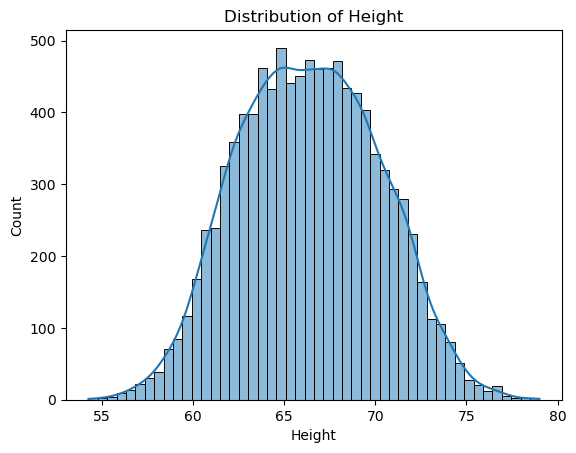

In [6]:
sns.histplot(data=df, x='Height', kde=True)
plt.title('Distribution of Height');

* Data is almost normally distributed.

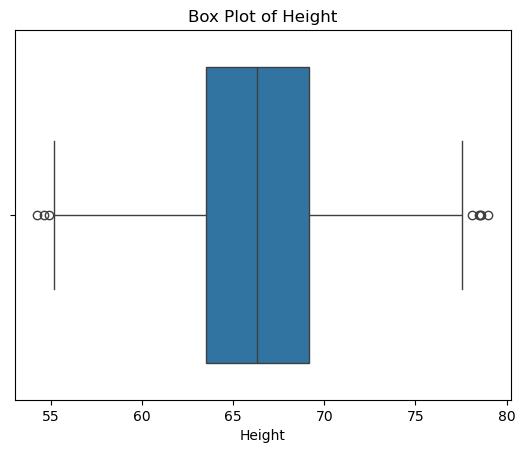

In [7]:
sns.boxplot(data=df, x='Height')
plt.title('Box Plot of Height');

* There are a few outliers.

### Upper and Lower Limits

In [8]:
upper_limit = df['Height'].quantile(0.99) # 99 percentile
lower_limit = df['Height'].quantile(0.01) # 1 percentile

In [9]:
upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

### Trimming

In [10]:
trimmed_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [11]:
trimmed_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
trimmed_df.shape

(9800, 3)

* 200 rows which has outliers were removed.

#### Statistics - Before vs After removing the outliers

In [13]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [14]:
trimmed_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

* There is slight change in mean (0.003) and std (0.202) before and after removing the outliers.

#### Distributions - Before and After removing outliers

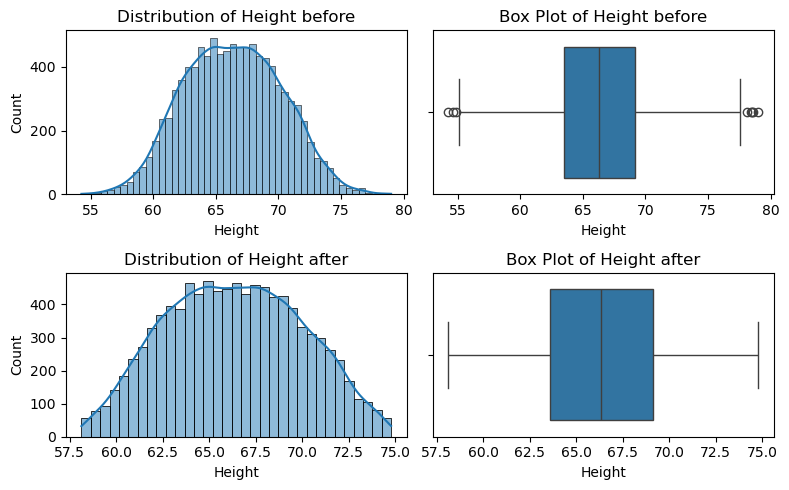

In [15]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Height', kde=True)
plt.title('Distribution of Height before');

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Height')
plt.title('Box Plot of Height before');

plt.subplot(2, 2, 3)
sns.histplot(data=trimmed_df, x='Height', kde=True)
plt.title('Distribution of Height after');

plt.subplot(2, 2, 4)
sns.boxplot(data=trimmed_df, x='Height')
plt.title('Box Plot of Height after');

plt.tight_layout()

* The only that has changed is the upper and lower limits (we have defined these).

### Capping

In [16]:
cap_df = df.copy()

In [17]:
cap_df['Height'] = np.where(
    cap_df['Height'] > upper_limit, upper_limit,
    np.where(
        cap_df['Height'] < lower_limit, lower_limit,
        cap_df['Height']
    )
)

In [18]:
cap_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
cap_df.shape

(10000, 3)

#### Statistics before and after capping

In [20]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [21]:
cap_df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

* Mean is almost the same but there is a change in Standard deviation.

#### Distributions - Before and After capping

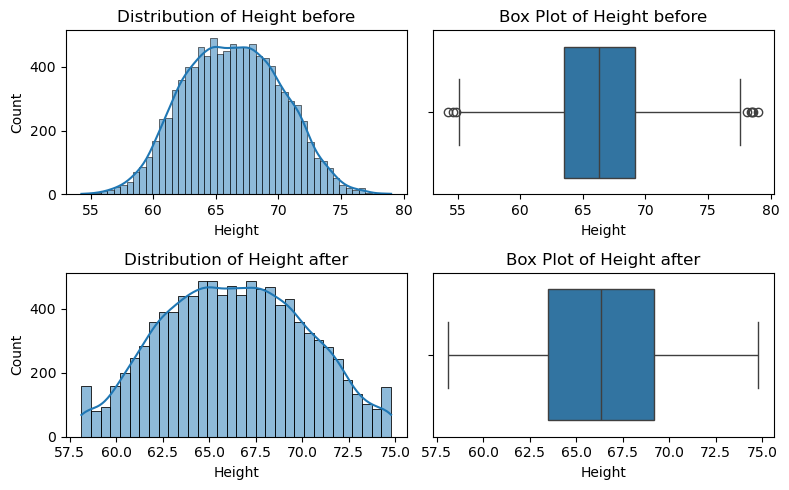

In [22]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Height', kde=True)
plt.title('Distribution of Height before');

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Height')
plt.title('Box Plot of Height before');

plt.subplot(2, 2, 3)
sns.histplot(data=cap_df, x='Height', kde=True)
plt.title('Distribution of Height after');

plt.subplot(2, 2, 4)
sns.boxplot(data=cap_df, x='Height')
plt.title('Box Plot of Height after');

plt.tight_layout()

* The only that has changed is the upper and lower limits (we have defined these).